In [1]:
import numpy as np 

all_train_data = np.genfromtxt("fleurs_training.csv", delimiter=",")
nRow, nCol = all_train_data.shape
print(f"There are {nRow} rows and {nCol} columns")

There are 120 rows and 5 columns


In [2]:
train_data = all_train_data[:,0:4]
train_data.shape

(120, 4)

In [3]:
train_labels = all_train_data[:,4]
train_labels.shape

(120,)

In [4]:
all_test_data = np.genfromtxt("fleurs_test.csv", delimiter=",")
nRow, nCol = all_test_data.shape
print(f"There are {nRow} rows and {nCol} columns")

There are 30 rows and 5 columns


In [5]:
test_data = all_test_data[:,0:4]
test_data.shape

(30, 4)

In [6]:
test_labels = all_test_data[:,4]
test_labels.shape

(30,)

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_model()
history = model.fit(train_data, train_labels, 
                    epochs=200, 
                    batch_size=32, 
                    validation_data = (test_data, test_labels),
                    verbose = 0)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

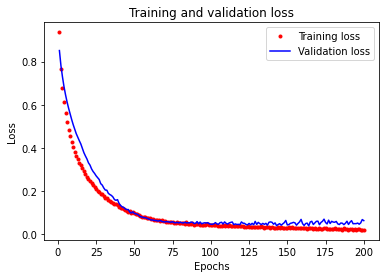

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r.", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

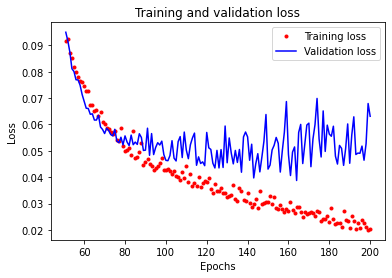

In [12]:
debut_epochs = 50
epochs_restriction = range(debut_epochs+1, len(loss_values) + 1)
plt.plot(epochs_restriction, loss_values[debut_epochs:], "r.", label="Training loss")
plt.plot(epochs_restriction, val_loss_values[debut_epochs:], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

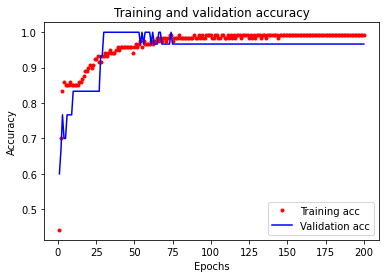

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r.", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

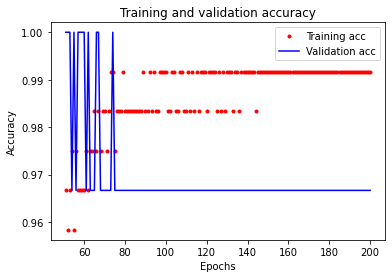

In [14]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs_restriction, acc[debut_epochs:], "r.", label="Training acc")
plt.plot(epochs_restriction, val_acc[debut_epochs:], "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

On réentraine le réseau avec une valeur adaptée pour epochs.

In [15]:
model = build_model()
history = model.fit(train_data, train_labels, 
                    epochs=80, 
                    batch_size=32, 
                    verbose = 0)

In [16]:
predictions = model(test_data)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.97


In [17]:
fleur_de_test = np.array([[6.6, 3.3, 5.8, 2.5]])

In [18]:
fleur_de_test -= mean
fleur_de_test /= std

In [19]:
prediction = model(fleur_de_test)
prediction = prediction.numpy()
prediction

array([[7.3035494e-10, 8.9315181e-05, 9.9991071e-01]], dtype=float32)

In [20]:
predicted_label = np.argmax(prediction, axis=1)
predicted_label

array([2], dtype=int64)

In [21]:
fleur_de_test2 = np.array([[6.2, 2.9, 4.5, 1.5]])

In [22]:
fleur_de_test2 -= mean
fleur_de_test2 /= std

In [23]:
prediction = model(fleur_de_test2)
prediction = prediction.numpy()
prediction

array([[6.0072976e-05, 9.2993182e-01, 7.0008077e-02]], dtype=float32)

In [24]:
predicted_label = np.argmax(prediction, axis=1)
predicted_label

array([1], dtype=int64)